<a href="https://colab.research.google.com/github/eotache/Data-Analysis-Freelance-practice/blob/master/Nigeria_Covid_19_data_analysis%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NIGERIA COVID-19 DATA ANALYSIS 


Covid-19 pandemic is a global health crisis, which is causing a huge challenge to our health care system and impacting the world's economy and human activities all around the globe. The virus has spread to all part of the continent with over 5 million confirmed cases in America, Europe, Asia and Africa. 
However,the UN, WHO, Healthcare communities, Scientist and Governments are working round the clock to curb the spread of the disease through lock down measures as well as taking further steps in search of potential drug or vaccine that can eventually cure the virus.  
In Nigeria, the NCDC(Nigeria Center for Disease control) provides daily update on the cases of Covid-19, the center as been at the fore front of dessimating information to the public about the virus. 
currently we have over 18,000 confirmed cases and over 400 death in Nigeria. 

This analysis is aimed at using python programming and applying data science libraries to create more insight and provide detailed data analysis and visualization. 

In this project I will be using: 
jupyter Note book, Pandas Library for data cleaning and manipulation, numpy library for arithematic calculations, Matplotlip, Seaborn for Visualization, foluim library for map creation, beautiful soup and tabulate libraries for web scrapping.

### 1. Importing libraries and web scrapping to get data. 

In [1]:
import pandas as pd #for data cleaning and manipulation
import numpy as np
import matplotlib.pyplot as plt #for data visualizaion
import seaborn as sns           #for data visualization
import requests 
from bs4 import BeautifulSoup  #for web scrapping
from tabulate import tabulate  #for tabulation scrapped data
import folium                  #for map creation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#scrapping data from NCDC official website
res = requests.get('https://covid19.ncdc.gov.ng/')

In [3]:
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]
DF = pd.read_html(str(table))[0]

In [4]:
DF.head(6)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,7896,6406,1382,108
1,FCT,1451,1021,402,28
2,Kano,1170,414,706,50
3,Oyo,764,474,281,9
4,Edo,729,538,160,31
5,Rivers,721,407,288,26


In [5]:
#to get the total sum of the values in the table
DF.sum()

States Affected                 LagosFCTKanoOyoEdoRiversOgunKadunaBornoGombeBa...
No. of Cases (Lab Confirmed)                                                18480
No. of Cases (on admission)                                                 11698
No. Discharged                                                               6307
No. of Deaths                                                                 475
dtype: object

### 2. converting tables to list and tuple for easy access as DataFrame

In [7]:
#The aim is to convert each column in the NCDC dataset into a list using the (tolist() function)
States_Affected = DF["States Affected"].tolist()
Cases = DF['No. of Cases (Lab Confirmed)'].tolist()
Active = DF['No. of Cases (on admission)'].tolist()
Discharged = DF['No. Discharged'].tolist()
Deaths = DF['No. of Deaths'].tolist()

In [8]:
#the above list are converted into a tuple for easy convertion into a dataframe using (zip function)
zippedList =  list(zip(States_Affected, Cases, Active, Discharged, Deaths))

#Assinging a new dataframe called (Cov19_Nig) which contains list of states and Covid_19 cases
Cov19_Nig = pd.DataFrame(zippedList, columns = ['States' , 'Cases', 'Active', 'Discharged', 'Deaths'])

In [104]:
Cov19_Nig.head(37)

,States,Cases,Active,Discharged,Deaths
0,Lagos,7896,6406,1382,108
1,FCT,1451,1021,402,28
2,Kano,1170,414,706,50
3,Oyo,764,474,281,9
4,Edo,729,538,160,31
5,Rivers,721,407,288,26
6,Ogun,586,215,356,15
7,Kaduna,513,217,286,10
8,Borno,464,101,333,30
9,Gombe,447,243,191,13


In [10]:
#summary value of our new dataframe(Cov19_Nig)
Cov19_Nig.describe()

,Cases,Active,Discharged,Deaths
count,36.000000,36.000000,36.000000,36.000000
mean,513.333333,324.944444,175.194444,13.194444
std,1308.558640,1062.671484,256.068386,19.664064
min,3.000000,0.000000,0.000000,0.000000
25%,66.000000,11.750000,33.750000,3.000000
50%,177.500000,88.500000,87.000000,6.000000
75%,451.250000,215.500000,245.000000,15.000000
max,7896.000000,6406.000000,1382.000000,108.000000


In [12]:
# Selecting columns to be used to plot a bar chart and assigning it to a new variable called(No_cases)
No_cases = Cov19_Nig[['States', 'Cases', 'Active']]

In [13]:
No_cases.head(6)

,States,Cases,Active
0,Lagos,7896,6406
1,FCT,1451,1021
2,Kano,1170,414
3,Oyo,764,474
4,Edo,729,538
5,Rivers,721,407


### 3. Visualizing using Matplotlib and seaborn 

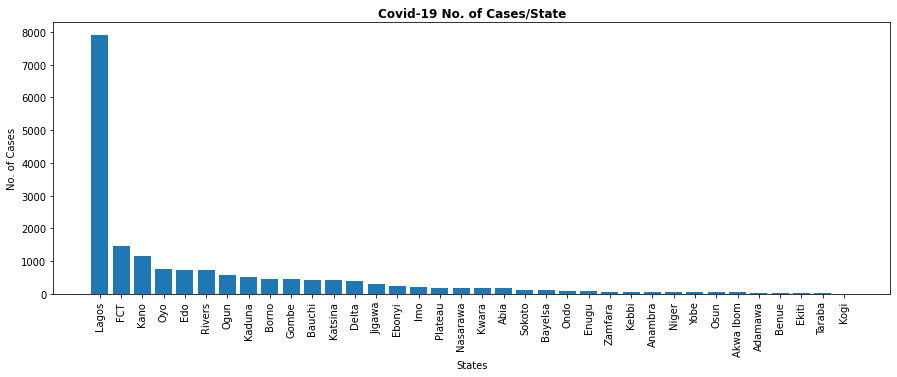

In [14]:
#Using Matplotlib to compare data of cases per state using barchart
fig= plt.figure(figsize=(15,5))
States = No_cases['States']
plt.bar(No_cases['States'], No_cases['Cases'])
plt.xticks(States, rotation='vertical')
plt.title('Covid-19 No. of Cases/State',  fontdict={'fontweight': 'bold'})
plt.ylabel('No. of Cases')
plt.xlabel('States')

plt.show()

From the graph above we can see that Lagos, FCT and Kano have the highest number of cases.

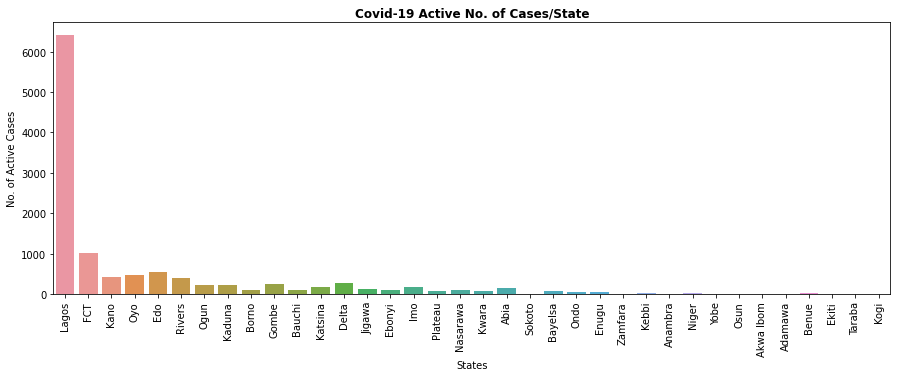

In [15]:
# Using Seaborn (sns) to compare data of  active cases per state and death
plt.figure(figsize=(15,5))
sns.barplot(x='States', y='Active', data=No_cases)
sns.set(style="whitegrid")
plt.title('Covid-19 Active No. of Cases/State',  fontdict={'fontweight': 'bold'})
plt.ylabel('No. of Active Cases')
plt.xticks(rotation=90)

plt.show()


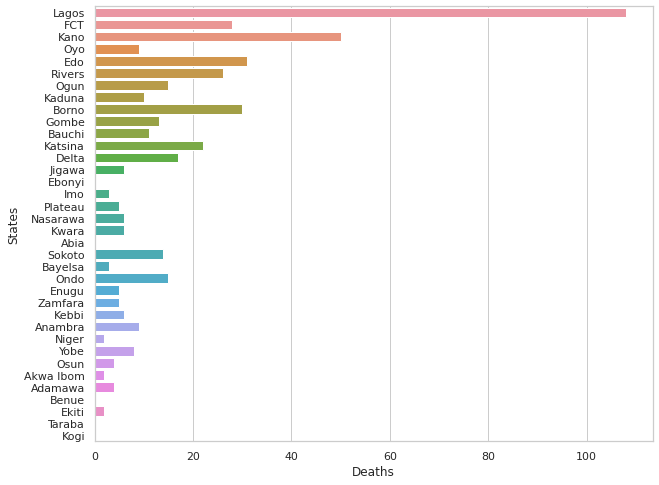

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x=Cov19_Nig['Deaths'],y=Cov19_Nig['States'])
plt.show()

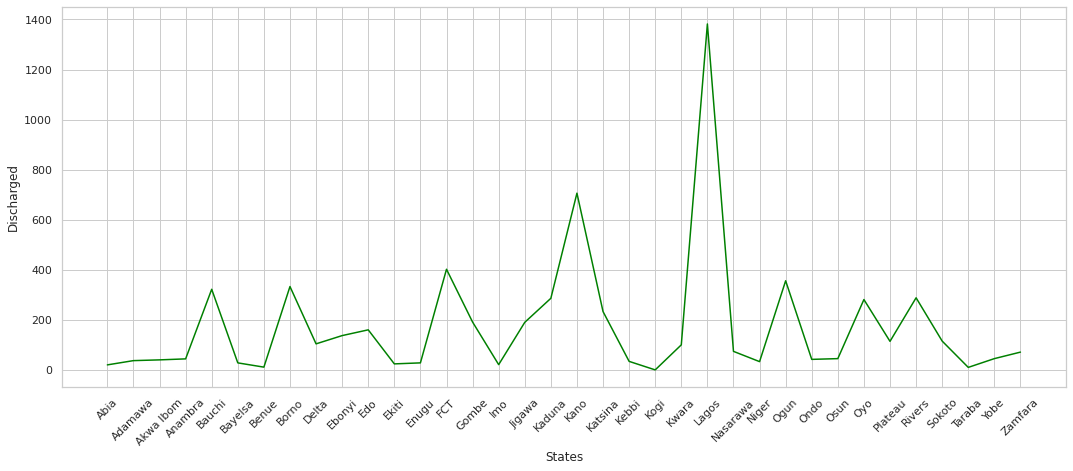

In [63]:
plt.figure(figsize=(18,7))
sns.lineplot(x='States',y='Discharged', data = Cov19_Nig, color = 'green') 
plt.xticks(rotation=45)
plt.show() 
#changed line color and added xtick rotation to accomodate our x label

### 4. plotting map to showing Covid-19 No. of cases by state

In [ ]:
# To start with, I will need to get the longitude and latitude of states in Nigeria.
#I  downlaoded the CSV from (ng.com) and imported it into workbook(pd.read_CVS

In [85]:
cordinates = pd.read_csv('ng.csv')

In [86]:
#to view table
cordinates.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Lagos,6.454066,3.394673,Nigeria,NG,Lagos,minor,9466000.0,1536.0
1,Kano,12.002381,8.513160,Nigeria,NG,Kano,admin,3140000.0,3140000.0
2,Ibadan,7.377562,3.905907,Nigeria,NG,Oyo,admin,2628000.0,1814570.0
3,Abuja,9.083333,7.533333,Nigeria,NG,Federal Capital Territory,primary,1576000.0,162135.0
4,Kaduna,10.526413,7.438795,Nigeria,NG,Kaduna,admin,1442000.0,940593.0


In [87]:
#The above table contain columns we dont need, as such we will be dropping them.
cordinates = cordinates.drop(columns=['iso2','population', 'population_proper', 'country', 'city'])

In [88]:
cordinates.head(5)

,lat,lng,admin,capital
0,6.454066,3.394673,Lagos,minor
1,12.002381,8.513160,Kano,admin
2,7.377562,3.905907,Oyo,admin
3,9.083333,7.533333,Federal Capital Territory,primary
4,10.526413,7.438795,Kaduna,admin


In [ ]:
# Viewing our data, they contain towns and city that are irrelevant our project, 
#hence I will be filter to keep state and capitals only

In [89]:
state = cordinates[cordinates['capital']== 'admin']
state.shape

(36, 4)

In [90]:
state.head()

,lat,lng,admin,capital
1,12.002381,8.513160,Kano,admin
2,7.377562,3.905907,Oyo,admin
4,10.526413,7.438795,Kaduna,admin
5,6.338153,5.625749,Edo,admin
7,4.777423,7.013404,Rivers,admin


In [91]:
Cov19_Nig.head()

,States,Cases,Active,Discharged,Deaths
0,Lagos,7896,6406,1382,108
1,FCT,1451,1021,402,28
2,Kano,1170,414,706,50
3,Oyo,764,474,281,9
4,Edo,729,538,160,31


In [92]:
# I will rename (admin to States) for clarity
state = state.rename(columns={'admin': 'States'})

In [93]:
state.head()

,lat,lng,States,capital
1,12.002381,8.513160,Kano,admin
2,7.377562,3.905907,Oyo,admin
4,10.526413,7.438795,Kaduna,admin
5,6.338153,5.625749,Edo,admin
7,4.777423,7.013404,Rivers,admin


In [ ]:
# I will be sorting both state and Cov19_Nig by States alphabetical order, this will make it easy merge both data set

In [94]:
state.sort_values('States')

,lat,lng,States,capital
33,5.524913,7.494613,Abia,admin
53,9.208394,12.481464,Adamawa,admin
19,5.033333,7.926570,Akwa Ibom,admin
20,6.212690,7.071986,Anambra,admin
27,10.310321,9.843883,Bauchi,admin
494,4.926746,6.267636,Bayelsa,admin
694,7.733746,8.521390,Benue,admin
10,11.846924,13.157122,Borno,admin
22,4.958931,8.326950,Cross River,admin
280,6.198474,6.727431,Delta,admin


In [95]:
#I noticed in our dataframe above (FCT) is missing in States column, as such I manually input the neccessary figure 
# by creating a dictionary and using the append keyword. 
new_row = {'lat':7.3986, 'lng':9.0765, 'States':'FCT', 'capital':'admin'}


In [96]:
states = state.append(new_row, ignore_index=True)

In [98]:
state.sort_values('States')

,lat,lng,States,capital
33,5.524913,7.494613,Abia,admin
53,9.208394,12.481464,Adamawa,admin
19,5.033333,7.926570,Akwa Ibom,admin
20,6.212690,7.071986,Anambra,admin
27,10.310321,9.843883,Bauchi,admin
494,4.926746,6.267636,Bayelsa,admin
694,7.733746,8.521390,Benue,admin
10,11.846924,13.157122,Borno,admin
22,4.958931,8.326950,Cross River,admin
280,6.198474,6.727431,Delta,admin


In [99]:
Cov19_Nig.sort_values('States')

,States,Cases,Active,Discharged,Deaths
19,Abia,173,153,20,0
31,Adamawa,42,1,37,4
30,Akwa Ibom,48,6,40,2
26,Anambra,66,13,44,9
10,Bauchi,438,105,322,11
21,Bayelsa,111,80,28,3
32,Benue,36,25,11,0
8,Borno,464,101,333,30
12,Delta,400,279,104,17
14,Ebonyi,234,97,137,0


In [105]:
Cov19_Nig.sort_values('States')

,States,Cases,Active,Discharged,Deaths
19,Abia,173,153,20,0
31,Adamawa,42,1,37,4
30,Akwa Ibom,48,6,40,2
26,Anambra,66,13,44,9
10,Bauchi,438,105,322,11
21,Bayelsa,111,80,28,3
32,Benue,36,25,11,0
8,Borno,464,101,333,30
12,Delta,400,279,104,17
14,Ebonyi,234,97,137,0


In [106]:
# I merge the two DataFrames together on states
Map_data = pd.merge(state, Cov19_Nig, on='States')
Map_data.shape

(36, 8)

In [107]:
Map_data.head(6)

,lat,lng,States,capital,Cases,Active,Discharged,Deaths
0,12.002381,8.513160,Kano,admin,1170,414,706,50
1,7.377562,3.905907,Oyo,admin,764,474,281,9
2,10.526413,7.438795,Kaduna,admin,513,217,286,10
3,6.338153,5.625749,Edo,admin,729,538,160,31
4,4.777423,7.013404,Rivers,admin,721,407,288,26
5,11.846924,13.157122,Borno,admin,464,101,333,30


#### Map feature of Nigeria Covid-19 datasets

In [108]:
#Create Map of Nigeria before we insert cases into each states
Nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start = 7)

Nigeria_map

In [109]:
# initiating map using a feature group of folium library for cases in our Map_data Data frame
Map = folium.map.FeatureGroup()

In [117]:
# create a loop function to loop through the Map_data and add each cases to feature group
for lat, lng, in zip(Map_data.lat, Map_data.lng):
    Map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.4
        )
    )

In [118]:
# to add pop-up cases text to each marker on the map
latitudes = list(Map_data.lat)
longitudes = list(Map_data.lng)
labels = list(Map_data.Cases)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],
                  popup= folium.Popup('<strong>' + str(label) + '</strong>')).add_to(Nigeria_map) 
       
    
# add Cases to map
Nigeria_map.add_child(Map)

In [ ]:
### Creating map for active cases

In [119]:
# create a loop function to loop through the Map_data and add each cases to feature group
for lat, lng, in zip(Map_data.lat, Map_data.lng):
    Map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )

In [120]:
# to add pop-up Active  text to each marker on the map
latitudes = list(Map_data.lat)
longitudes = list(Map_data.lng)
labels = list (Map_data.Active)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],
                  popup= folium.Popup('<strong>' + str(label) + '</strong>')).add_to(Nigeria_map) 
       
    
# add Cases to map
Nigeria_map.add_child(Map)

In [ ]:
### Creating map for Deaths cases

In [121]:
# create a loop function to loop through the Map_data and add each cases to feature group
for lat, lng, in zip(Map_data.lat, Map_data.lng):
    Map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )

In [122]:
# to add pop-up Active  text to each marker on the map
latitudes = list(Map_data.lat)
longitudes = list(Map_data.lng)
labels = list (Map_data.Deaths)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],
                  popup= folium.Popup('<strong>' + str(label) + '</strong>')).add_to(Nigeria_map) 
       
    
# add Cases to map
Nigeria_map.add_child(Map)

### UPDATE

According to the NCDC(Nigeria center for disease control, by midnight 18th, June 2020, the total number of confirmed cases above  (18000), number of active cases above(11,000), number of dischared cases above (6,000), and number of death above(400). Furthermore, unknown exposure accounts for 74% provenance, contacts account for 24% and travels account for 2%. 
However, the NCDC has activated the emergency operations ceneters(EOC) at level 3, the highest in the country. subsequently, engagement with state level partners are continously held, on modalities of supports to help contain the spread of the virus and reduce the risk and rate of infections. 